In [1]:
from jyro.simulator import (Canvas, Physics, Pioneer, Pioneer16Sonars, PioneerFrontLightSensors,
                            Camera, Simulator, VSimulator, DepthCamera, MyroIR, Color, SequenceViewer)
import numpy as np
from math import pi
from random import random
import random
import matplotlib.pyplot as plt

## Map definition

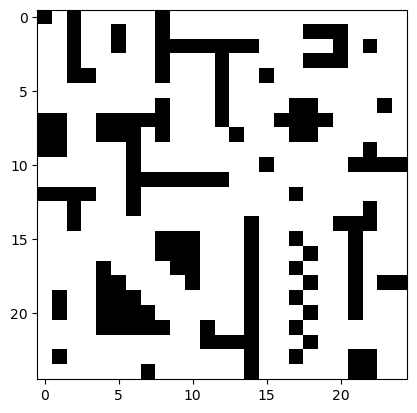

In [2]:
map =[[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
      [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
      [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
      [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]]

map = np.array(map)

def draw_grid(image, line_space=20):
    H, W = image.shape
    image[0:H:line_space] = 1
    image[:, 0:W:line_space] = 1

plt.imshow(~map, cmap='gray')

In [3]:
def image_to_cartesian(map, val):
    coords_y, coords_x = np.where(map == val)
    coords = np.stack([coords_x, coords_y], axis=1)
    coords[:, 1] = (len(map)) - coords[:, 1]

    return coords

obstacle_coords = image_to_cartesian(map, 1)
path_coords = image_to_cartesian(map, 0)

assert len(obstacle_coords)+len(path_coords) == np.prod(map.shape)

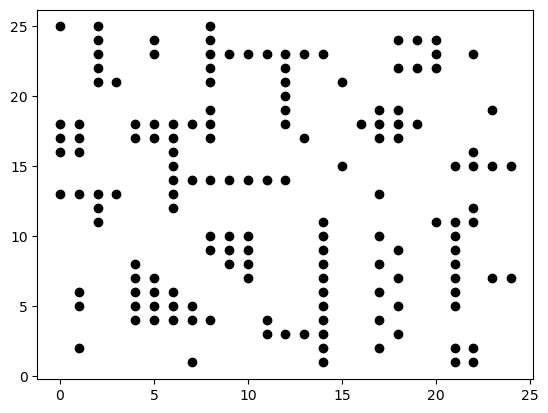

In [4]:
#obstacle_coords_y, obstacle_coords_x = np.where(map==1)
#obstacle_coords = np.stack([obstacle_coords_x, obstacle_coords_y], axis=1)
#obstacle_coords[:, 1] = (len(map)) - obstacle_coords[:, 1]

plt.scatter(obstacle_coords[:, 0], obstacle_coords[:, 1], color='black')
plt.show()

In [5]:
obstacle_boxes = []
for o_p in obstacle_coords:
    ul_x, ul_y = o_p
    lr_x = ul_x + 1
    lr_y = ul_y - 1
    obstacle_boxes.append((ul_x, ul_y, lr_x, lr_y))

## Robot/World calibration

In [6]:
sim = Physics()

def make_world(sim):
    sim.addBox(0, 0, 25, 25, fill='white', wallcolor="black")
    sim.addLight(10, 3, 1.00, color=Color(255, 255, 0, 64))
    
    for i in obstacle_boxes:
        ul_x, ul_y, lr_x, lr_y = i
        sim.addBox(ul_x, ul_y, lr_x, lr_y, fill='black')

make_world(sim)

In [7]:
def get_random_start(path_coords):
    # Get point from clear path coords
    x, y = random.choice(path_coords)
    return x + random.random()*0.1, y + random.random()*0.1, random.random()*2*pi

Use normal distribution for adding noise!

In [8]:
get_random_start(path_coords)

(18.082781406375275, 11.05646267601287, 2.446019021433732)

In [9]:
## Robot class
class SonarRobot(Pioneer):
    def __init__(self, name, x, y, angle):
        Pioneer.__init__(self, name, x, y, angle)
        self.addDevice(Pioneer16Sonars())
        light_sensors = PioneerFrontLightSensors(3) #parameter defines max range
        light_sensors.lightMode = 'ambient'
        self.addDevice(light_sensors)

    def get_sensor_data(self):
        light = self.devices['light']
        sonar = self.devices['sonar']
        return [light, sonar]

    def brain(self):
        light, sonar = self.get_sensor_data()
        print(light, sonar)
        self.move(random.random() * 2 - 1,
            random.random() * 2 - 1)

sr = SonarRobot('Pioneer', *get_random_start(path_coords))



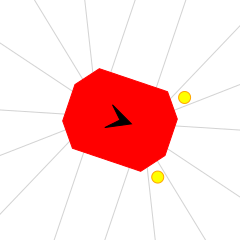

In [10]:
sr

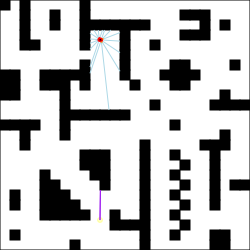

In [11]:
sim.addRobot(sr)
canvas = Canvas((250, 250))
sim.draw(canvas)

In [76]:
def determine_move(senses):
    """Returns tuple of (translation, rotation) movement"""
    lights = senses[0]
    left_light = lights[0]
    right_light = lights[1]
    light_diff = abs(left_light-right_light)
    sonars = senses[1]
    # if found light, then stop
    if sum(lights) > 1.8:
        return (0, 0)
    # if getting close to an obstacle in front, turn to avoid it
    elif min(sonars[2:6]) < 0.5:
        # if closer on left, turn right
        if min(sonars[1:4]) < min(sonars[4:7]):
            return (0, -0.3)
        # otherwise, turn left
        else:
            return (0, 0.3)
    # if diff in light readings is high enough or total of light readings is
    # low ennough, then turn towards the light
    elif light_diff > 0.1 or sum(lights) < 0.1:
        # if brighter on left side, turn slightly left
        if  left_light > right_light:
            return (0.1, 0.3)
        else:
            return (0.1, -0.3)
    # default is to go straight
    else:
        return (0.3, 0)

def find_light_brain(robot):
    senses = get_senses(robot)
    translate, rotate = determine_move(senses)
    robot.move(translate, rotate)

In [77]:
help(sr.move)

Help on method move in module jyro.simulator.robot:

move(vx, va) method of __main__.SonarRobot instance



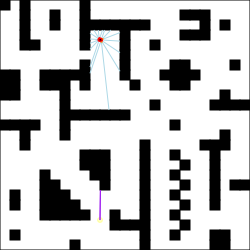

In [12]:
sr.move(0.5, 4)
sr.move(0.3, 1)
sim.draw(canvas)

In [13]:
from IPython.display import display, clear_output

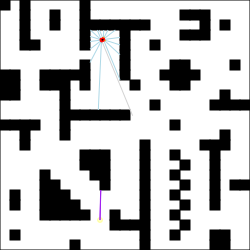

CPU times: user 5.22 s, sys: 19 ms, total: 5.24 s
Wall time: 11.5 s


In [14]:
%%time

import time

for i in range(70):
    sim.step(run_brain=False)
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)
        time.sleep(.085) # sleep for a bit

In [46]:
def generate_data(robot, make_world, trials, filename):
    sim = Simulator(robot, make_world)
    fp = open(filename, "w")
    for i in range(trials):
        print("Trial %d" % i)
        random_start(robot)
        while True:
            senses = get_senses(robot)
            print(senses)
            translate, rotate = determine_move(senses)
            if translate == 0 and rotate == 0:
                break # found light, so end trial
            robot.move(translate, rotate)
            sim.step()
            lights = senses[0]
            sonars = [min(v/3.0, 1.0) for v in senses[1]] #normalize sonar values
            for value in lights:
                fp.write("%.3f " % value)
            for value in sonars[1:7]:
                fp.write("%.3f " % value)
            fp.write("%.1f %.1f\n" % (translate, rotate))
    fp.close()

In [47]:
generate_data(robot, make_world, 5, "testing_data.txt")

Trial 0
[[0.03333333333333333, 0.03333333333333333], [1.6601849943047582, 8.0, 0.556089293809007, 0.2697479659564646, 0.1793176478724278, 3.219733596296749, 1.3881662042938554, 0.9678333571829502, 0.8870395176273997, 0.8205522311113717, 0.9573599554240819, 0.5068170910902275, 0.37007710687758033, 0.3869728216046316, 0.5207850682040048, 1.165098221079691]]
[[0.03333333333333333, 0.03333333333333333], [1.5311564910917044, 8.0, 0.6017422597526285, 0.2812442491804767, 0.1813156496626257, 3.5731869340066185, 1.4447364157331193, 0.9853977123178489, 0.8975369552256776, 0.8166791371350318, 0.9380100559176591, 0.5239068919669791, 0.37286649790658316, 0.38266800478537527, 0.5039530717398198, 1.0758911135747893]]
[[0.03333333333333333, 0.03333333333333333], [1.4198747018968858, 8.0, 0.6541795312958439, 0.2937864258464811, 0.18370304638704277, 4.011232983651518, 1.5067546348072205, 1.0044499960720643, 0.9093334911463725, 0.8137311472928759, 0.9202366982530581, 0.5425423677696425, 0.376225838149295

KeyboardInterrupt: 